# Problem Statement

Airbnb Inc is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. Airbnb has close to 150 million customers across the world. Price is the most important factor considered by the customer while making booking into a property. Strategic pricing of the properties is important to avoid losing customers to the competitors.  
  
We have a data of 74111 Airbnb properties across the nations. Based on this data build a simple and multiple linear regression model to predict the strategic pricing of a new listed property on Airbnb.


In [1]:

import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [2]:
import pandas as pd # to work with data frames
import seaborn as sns # to visulize the data
from sklearn.linear_model import LinearRegression # To use Linear Regression
from sklearn import metrics # to measure the model

### Importing data

In [3]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("")  

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (705343230.py, line 2)

In [20]:
df

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000


In [21]:
df.columns

Index(['id', 'room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

In [22]:
df.log_price

0        5.010635
1        5.129899
2        4.976734
3        6.620073
4        4.744932
           ...   
74106    4.605170
74107    5.043425
74108    5.220356
74109    5.273000
74110    4.852030
Name: log_price, Length: 74111, dtype: float64

In [23]:
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [8]:
df.tail(20)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
74091,3779249,Entire home/apt,2.0,1.0,moderate,False,f,100.0,0.0,1.0,5.010635
74092,18395940,Entire home/apt,4.0,2.0,strict,True,t,96.0,2.0,3.0,4.700480
74093,14838304,Entire home/apt,4.0,1.0,strict,True,f,91.0,1.0,1.0,4.948760
74094,38663,Private room,2.0,1.0,strict,True,f,86.0,1.0,1.0,3.688879
74095,2278677,Entire home/apt,2.0,1.0,flexible,False,f,NaN,1.0,1.0,4.382027
74096,7331958,Private room,2.0,1.0,flexible,False,f,60.0,1.0,1.0,3.912023
74097,15952947,Private room,2.0,1.0,flexible,True,t,92.0,1.0,1.0,4.700480
74098,8342838,Entire home/apt,4.0,1.0,flexible,True,f,88.0,0.0,2.0,4.553877
74099,4615631,Private room,2.0,1.0,moderate,True,t,96.0,1.0,1.0,4.276666
74100,13862304,Private room,2.0,1.0,strict,True,f,93.0,1.0,1.0,4.605170


In [9]:
import seaborn as sns

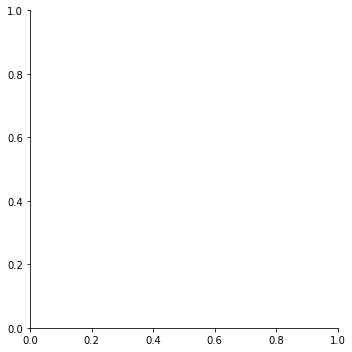

In [24]:
sns.lmplot(df)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [26]:
print(np.log(df.accommodates.head()))
print(df.accommodates.head())


0    1.098612
1    1.945910
2    1.609438
3    1.386294
4    0.693147
Name: accommodates, dtype: float64
0    3.0
1    7.0
2    5.0
3    4.0
4    2.0
Name: accommodates, dtype: float64


In [27]:
df.accommodates

0        3.0
1        7.0
2        5.0
3        4.0
4        2.0
        ... 
74106    1.0
74107    4.0
74108    5.0
74109    2.0
74110    4.0
Name: accommodates, Length: 74111, dtype: float64

In [28]:
df11 = pd.read_csv("C:\\Users\\DELL\\Desktop\\lmtest.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\DELL\\Desktop\\lmtest.csv'

In [29]:
sns.lmplot(x='x', y='y', data=df, order=4)

KeyError: "None of [Index(['x', 'y'], dtype='object')] are in the [columns]"

In [ ]:
sns.lmplot(x='x', y='y', data=df11, order=1)

In [ ]:
log_acc=np.log(df.accommodates.head())
print(log_acc)

sns.lmplot(x='accommodates', y='log_price', data=df, order=1)

In [ ]:
sns.lmplot(x='review_scores_rating', y='log_price', data=df, order=3)

### EDA

In [30]:
# Check top few records to get a feel of the data structure
df.head() # to see some top n records

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [31]:
# ID's, user names, numbers, serial numbers etc does not add any value to prediction so drop them

In [32]:
# drop the id column as it is useless for the model
df = df.drop('id', axis=1) # axis = 1(Col), 2(Row)

In [33]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [34]:
# to get good understanding of all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


In [35]:
df.describe() # will show only numeric data

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,74108.000000,73908.000000,57389.000000,74019.000000,73980.000000,74111.000000
mean,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069
std,2.153603,0.582054,7.836556,0.852149,1.254142,0.717394
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,92.000000,1.000000,1.000000,4.317488
50%,2.000000,1.000000,96.000000,1.000000,1.000000,4.709530
75%,4.000000,1.000000,100.000000,1.000000,2.000000,5.220356
max,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


In [36]:
# to see data distribution & 5 point summary

df.describe(include = 'all') # Numeric + catagorical

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
count,74106,74108.000000,73908.000000,74103,74107,74111,57389.000000,74019.000000,73980.000000,74111.000000
unique,3,NaN,NaN,3,2,2,NaN,NaN,NaN,NaN
top,Entire home/apt,NaN,NaN,strict,True,f,NaN,NaN,NaN,NaN
freq,41308,NaN,NaN,32500,54399,54660,NaN,NaN,NaN,NaN
mean,NaN,3.155125,1.235272,NaN,NaN,NaN,94.067365,1.265797,1.710868,4.782069
std,NaN,2.153603,0.582054,NaN,NaN,NaN,7.836556,0.852149,1.254142,0.717394
min,NaN,1.000000,0.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000
25%,NaN,2.000000,1.000000,NaN,NaN,NaN,92.000000,1.000000,1.000000,4.317488
50%,NaN,2.000000,1.000000,NaN,NaN,NaN,96.000000,1.000000,1.000000,4.709530
75%,NaN,4.000000,1.000000,NaN,NaN,NaN,100.000000,1.000000,2.000000,5.220356


### unique values for categorical variables

In [37]:
# car, auto, shared, bike


df['room_type'].value_counts()

room_type
Entire home/apt    41308
Private room       30635
Shared room         2163
Name: count, dtype: int64

In [38]:
df['cancellation_policy'].value_counts()

cancellation_policy
strict      32500
flexible    22543
moderate    19060
Name: count, dtype: int64

In [39]:
df['cleaning_fee'].value_counts()

cleaning_fee
True     54399
False    19708
Name: count, dtype: int64

In [69]:
df.columns

Index(['accommodates', 'bathrooms', 'review_scores_rating', 'bedrooms', 'beds',
       'log_price', 'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cleaning_fee_True', 'instant_bookable_True'],
      dtype='object')

In [41]:
for col in df.columns:
    print(col)

room_type
accommodates
bathrooms
cancellation_policy
cleaning_fee
instant_bookable
review_scores_rating
bedrooms
beds
log_price


In [68]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

### Converting Instant_bookable from 'f' and 't' to boolean

In [67]:
df.instant_bookable.replace(['f','t'],[False,True],inplace=True )

AttributeError: 'DataFrame' object has no attribute 'instant_bookable'

In [70]:
df

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
0,3.0,1.0,100.0,1.0,1.0,5.010635,False,False,False,True,True,False
1,7.0,1.0,93.0,3.0,3.0,5.129899,False,False,False,True,True,True
2,5.0,1.0,92.0,1.0,3.0,4.976734,False,False,True,False,True,True
3,4.0,1.0,96.0,2.0,2.0,6.620073,False,False,False,False,True,False
4,2.0,1.0,40.0,0.0,1.0,4.744932,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,100.0,1.0,1.0,4.356709,False,False,False,True,True,False
74107,4.0,2.0,93.0,2.0,4.0,5.043425,False,False,True,False,True,False
74108,5.0,1.0,94.0,2.0,2.0,5.220356,False,False,True,False,True,True
74109,2.0,1.0,96.0,0.0,2.0,5.273000,False,False,False,True,True,True


### Converting categorical to dummy variables

In [53]:
df = pd.get_dummies(df, columns=['room_type','cancellation_policy','cleaning_fee','instant_bookable'],drop_first=True)

In [71]:
df.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
0,3.0,1.0,100.0,1.0,1.0,5.010635,False,False,False,True,True,False
1,7.0,1.0,93.0,3.0,3.0,5.129899,False,False,False,True,True,True
2,5.0,1.0,92.0,1.0,3.0,4.976734,False,False,True,False,True,True
3,4.0,1.0,96.0,2.0,2.0,6.620073,False,False,False,False,True,False
4,2.0,1.0,40.0,0.0,1.0,4.744932,False,False,True,False,True,True


In [72]:
# Are there any missing values ?
df.isnull().sum()

accommodates                    0
bathrooms                       0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
cleaning_fee_True               0
instant_bookable_True           0
dtype: int64

### Imputing missing values

In [56]:
df=df.apply(lambda x:x.fillna(x.median()),axis=0)

In [57]:
df.isnull().sum()

accommodates                    0
bathrooms                       0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
cleaning_fee_True               0
instant_bookable_True           0
dtype: int64

In [58]:
for column in df.columns: # picking the col one by one from df
    if df[column].dtype != 'object': # selecting only numerical 
        mean = df[column].mean() # taking mean of each fld
        df[column] = df[column].fillna(mean)# replacing missing value by mean   
        
df.isnull().sum()  

accommodates                    0
bathrooms                       0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
cleaning_fee_True               0
instant_bookable_True           0
dtype: int64

In [59]:
df.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
0,3.0,1.0,100.0,1.0,1.0,5.010635,False,False,False,True,True,False
1,7.0,1.0,93.0,3.0,3.0,5.129899,False,False,False,True,True,True
2,5.0,1.0,92.0,1.0,3.0,4.976734,False,False,True,False,True,True
3,4.0,1.0,96.0,2.0,2.0,6.620073,False,False,False,False,True,False
4,2.0,1.0,40.0,0.0,1.0,4.744932,False,False,True,False,True,True


In [60]:
df.describe()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,3.155078,1.234628,94.503434,1.265467,1.709611,4.782069
std,2.153572,0.581386,6.943159,0.851671,1.253389,0.717394
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,93.000000,1.000000,1.000000,4.317488
50%,2.000000,1.000000,96.000000,1.000000,1.000000,4.709530
75%,4.000000,1.000000,99.000000,1.000000,2.000000,5.220356
max,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


### Checking for duplicates

In [61]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 21145


In [62]:
dups = df.duplicated()
dups.sum() 

21145

In [63]:
#print('Before',df.shape)
df.drop_duplicates(inplace=True) 
#print('After',df.shape)

In [64]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


In [65]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Correlation Plot

In [ ]:
df

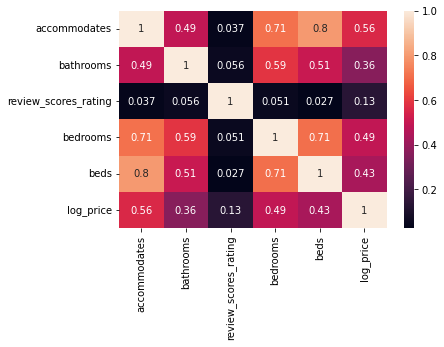

In [66]:
sns.heatmap(df.iloc[:, 0:6].corr(),annot=True)
plt.show()

**The variable 'Accommodates', 'bedrooms','bathrooms', 'beds' are having correlation with each other.**


In [ ]:
df.head()

In [ ]:
df.info()

### Outlier Checks

In [ ]:
df.info()

In [ ]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes=='float64')].index
cont

In [ ]:
plt.figure(figsize=(15,15))
df[cont].boxplot(vert = 0)
#plt.title('With Outliers',fontsize=16)
plt.show()

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
import numpy as np

In [ ]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

In [ ]:
plt.figure(figsize=(15,15))
df[cont].boxplot()
plt.title('After Outlier Removal',fontsize=16)
plt.show()

### Data Distribution

In [ ]:
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

### Train-Test Split

In [ ]:
df

In [ ]:
# Copy all the predictor variables into X dataframe
X = df.drop('log_price', axis=1)

# Copy target into the y dataframe. 
y = df[['log_price']]

In [ ]:
X

In [ ]:
y

In [ ]:
X.head()

In [ ]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [ ]:
y_train # 42372 + 10594

# 10594 + 42372

### Linear Regression Model

In [ ]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression() # creating an object of model
ml = regression_model.fit(X_train, y_train) # creating the model

In [ ]:
type(ml)

In [ ]:
ml.intercept_

In [ ]:
df.head(2)

In [ ]:
ml.coef_

In [ ]:
type(regression_model)

In [ ]:
X.head()

In [ ]:
regression_model.intercept_

In [ ]:
regression_model.coef_

In [ ]:
regression_model.coef_

In [ ]:
regression_model.intercept_

In [ ]:
X_train.columns

In [ ]:
regression_model.coef_

In [ ]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

In [ ]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

In [ ]:
regression_model.score(X_train)

In [ ]:
# R square on training data
regression_model.score(X_train, y_train)

50% of the variation in the log_price is explained by the predictors in the model for train set

In [ ]:
# R square on testing data
regression_model.score(X_test, y_test)

In [ ]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)

In [ ]:
predicted_train

In [ ]:
metrics.mean_squared_error(y_train,predicted_train)

In [ ]:
metrics.mean_squared_error(y_train,predicted_train)

In [ ]:
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

In [ ]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

# Checking Multicollinearity in the data

In [ ]:
# VIF above 5 indicates a high multicollinearity

# In VIF method, we pick each feature and regress it against all of the other features

# VIF = 1/(1-R^2)

# As we see from the formula, greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater 
# correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. 
# Generally, a VIF above 5 indicates a high multicollinearity. 

In [ ]:
X

In [ ]:
X.columns

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
 
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [ ]:
vif_data

In [ ]:
vif_data

In [ ]:
X.values

In [ ]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

In [ ]:
X_new = X.drop(['accommodates'], axis = 1) 

In [ ]:
X_new

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# creating dummies for gender
#data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
  
# the independent variables set
#X = data[['Gender', 'Height', 'Weight']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_new.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_new.values, i)
                          for i in range(len(X_new.columns))]
  
print(vif_data)

In [ ]:
X_new = X_new.drop(['review_scores_rating'], axis = 1) 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# creating dummies for gender
#data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
  
# the independent variables set
#X = data[['Gender', 'Height', 'Weight']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_new.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_new.values, i)
                          for i in range(len(X_new.columns))]
  
print(vif_data)

In [ ]:
X_new = X_new.drop(['beds'], axis = 1) 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# creating dummies for gender
#data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
  
# the independent variables set
#X = data[['Gender', 'Height', 'Weight']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_new.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_new.values, i)
                          for i in range(len(X_new.columns))]
  
print(vif_data)

In [ ]:
X_new = X_new.drop(['bathrooms'], axis = 1) 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# creating dummies for gender
#data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
  
# the independent variables set
#X = data[['Gender', 'Height', 'Weight']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_new.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_new.values, i)
                          for i in range(len(X_new.columns))]
  
print(vif_data)

# Now all variables' VIF is below 5, so no sign of multicollinearity, so good to go for next iteration of model

In [ ]:
X_new.columns

In [ ]:
train_test_split(X_new,y,test_size = 0.25,random_state = 1)

In [ ]:
# CART
# SVR
# Rendom Forest Regressior

In [ ]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25 , random_state=1)

In [ ]:
X_test

### Linear Regression Model

In [ ]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression() # creating an object of model
regression_model.fit(X_train, y_train) # creating the model

In [ ]:
regression_model.coef_

In [ ]:
regression_model.intercept_

In [ ]:
X_train.columns

In [ ]:
regression_model.coef_

In [ ]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

In [ ]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

In [ ]:
# R square on training data
regression_model.score(X_train, y_train)

50% of the variation in the log_price is explained by the predictors in the model for train set

In [ ]:
# R square on testing data
regression_model.score(X_test, y_test)

In [ ]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)

In [ ]:
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

In [ ]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

In [ ]:
X_train.columns

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [ ]:
def show_metrics(prediction_test, prediction_train, y_test, y_train):
    MAE = round(metrics.mean_absolute_error(y_test, prediction_test), 2)
    MSE = round(metrics.mean_squared_error(y_test, prediction_test), 2)
    RMSE = round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)), 2)
    RMSE_ratio_test= round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)) / np.mean(y_test),3)
    RMSE_ratio_train = round(np.sqrt(metrics.mean_squared_error(y_train, prediction_train)) / np.mean(y_train),3)
    R_2_test = round(metrics.explained_variance_score(y_test, prediction_test), 2)
    R_2_train = round(metrics.explained_variance_score(y_train, prediction_train), 2)
    
    metrics_data = pd.DataFrame(data = [MAE, MSE, RMSE, RMSE_ratio_test, 
                                    RMSE_ratio_train, R_2_test, R_2_train]).T
    
    metrics_data.columns = ['MAE', 'MSE', 'RMSE', 'RMSE_ratio_test', 
                                    'RMSE_ratio_train', 'R_2_test', 'R_2_train']
    display(metrics_data)
           


In [ ]:
def analysis(model, X_train, X_test, y_train, y_test):
    
    prediction_test = model.predict(X_test)
    prediction_train = model.predict(X_train)
        
    
    show_metrics(prediction_test, prediction_train, y_test, y_train)
    
    sns.regplot(x = y_test, y = prediction_test, fit_reg=False)
    plt.title('Prediction and real')
    plt.show()

    sns.distplot(y_test - prediction_test, bins = 50)
    plt.title('Error variance')
    plt.show()

In [ ]:
rfm = RandomForestRegressor(
          max_depth = 10,
          n_jobs = -1, 
          random_state = 101,
          n_estimators = 700)

rfm.fit(X_train, y_train)

#comment = ''

analysis(
    model = rfm, 
    X_train = X_train , 
    X_test = X_test, 
    y_train = y_train, 
    y_test = y_test
)

In [ ]:
gbr_model = GradientBoostingRegressor(random_state = 101)
gbr_model.fit(X_train, y_train)

#comment = ''

#analysis(
#    model = gbr_model, 
#    X_train, 
#    X_test, 
#    y_train, 
#    y_test
#)

### Linear Regression using statsmodels

In [ ]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

In [ ]:
data_train.rename(columns = {"room_type_Entire home/apt": "room_type_entire_home", "room_type_Private room": "room_type_private_room", 
                     "room_type_Shared room": "room_type_shared_room"}, 
                      inplace = True) 

data_test.rename(columns = {"room_type_Entire home/apt": "room_type_entire_home", "room_type_Private room": "room_type_private_room", 
                     "room_type_Shared room": "room_type_shared_room"}, 
                      inplace = True) 

In [ ]:
data_train.columns

In [ ]:
expr= 'log_price ~ accommodates + bathrooms + instant_bookable+review_scores_rating +bedrooms + beds + room_type_private_room + room_type_shared_room  + cancellation_policy_moderate + cancellation_policy_strict + cleaning_fee_True'

In [ ]:
X_train.columns

In [ ]:
expr= 'log_price ~ bedrooms + room_type_private_room + room_type_shared_room  + cancellation_policy_moderate + cancellation_policy_strict + cleaning_fee_True'

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
lm1 = smf.ols(formula = expr, data = data_train).fit()
lm1.params

In [ ]:
print(lm1.summary())

In [ ]:
#There are four assumptions associated with a linear regression model:

#Linearity: The relationship between X and the mean of Y is linear.
#Homoscedasticity: The variance of residual is the same for any value of X.
#Independence: Observations are independent of each other.
#Normality: For any fixed value of X, Y is normally distributed.

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [ ]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('log_price',axis=1))-data_train['log_price'])**2)

In [ ]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

In [ ]:
np.sqrt(lm1.mse_resid) #another way

In [ ]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

In [ ]:
plt.scatter(y_test['log_price'], y_pred)
plt.show()

In [ ]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

 # Conclusion

The final Linear Regression equation is  
  
<b>log_price = b0 + b1 * instant_bookable[T.True] + b2 * accommodates + b3 * bathrooms + b4 * review_scores_rating + b5 * bedrooms + b6 * beds + b7 * room_type_private_room + b8 * room_type_shared_room + b9 * cancellation_policy_moderate + b10 * cancellation_policy_strict + b11 * cleaning_fee_True </b>
  
<b>log_price = (3.43) * Intercept + (-0.07) * instant_bookable[T.True] + (0.1) * accommodates + (0.18) * bathrooms + (0.01) * review_scores_rating + (0.16) * bedrooms + (-0.05) * beds + (-0.61) * room_type_private_room + (-1.08) * room_type_shared_room + (-0.06) * cancellation_policy_moderate + (-0.01) * cancellation_policy_strict + (-0.08) * cleaning_fee_True</b>  
  
When accommodates increases by 1 unit, log_price increases by 0.1 units, keeping all other predictors constant.  
similarly, when no. of bathrooms increases by 1 unit, log_price increases by 0.18 units, keeping all other predictors constant.
  
  
There are also some negative co-efficient values, for instance, room_type_shared_room has its corresponding co-efficient as -1.08. This implies, when the room type is shared room, the log_price decreases by 1.08 units, keeping all other predictors constant.

